In [21]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import copy

In [22]:
class human:
    def __init__(self, status, x, y):
        self.status = status
        self.x_position = x
        self.y_position = y
        self.infection_duration = 0 #initializing the value to store the duration of infection by each step
    
    def Vaccination(self):
        if self.status == "susceptible":
            self.status = "recovered"

In [23]:
def initiate_reset_world(size_y, size_x):
    world = [[list() for i in range(size_x)] for i in range(size_y)]
    return world

In [24]:
def populate(human, world):
    world[human.y_position][human.x_position].append(human)
    return world

In [25]:
def infection(human, infectious_rate):
    random_number = random.random()
    if random_number <= infectious_rate and human.status == "susceptible":
        human.status = "infected"
    return human

In [26]:
def infection_process(human, infection_duration):
    if human.status == "infected":
        human.infection_duration+= 1
        if human.infection_duration >= infection_duration:
            human.status = "recovered"
    return human

In [27]:
def move(human, size_x, size_y):
    #sizex is bigger than original matrix by 1
    move_number = random.randint(1,8)
    if move_number == 1 and human.x_position < size_x - 1: #moving east
        human.x_position += 1
    elif move_number == 2 and human.x_position > 0: #moving West
        human.x_position -= 1
    elif move_number == 3 and human.y_position < size_y - 1: #moving North
        human.y_position += 1
    elif move_number == 4 and human.y_position > 0: #moving South
        human.y_position -= 1
    elif move_number == 5 and human.y_position < size_y - 1 and human.x_position < size_x - 1: #moving NorthEast
        human.y_position += 1
        human.x_position += 1
    elif move_number == 6 and human.y_position > 0 and human.x_position > 0: #moving SouthWest
        human.x_position -= 1
        human.y_position -= 1
    elif move_number == 7 and human.y_position < size_y - 1 and human.x_position > 0: #moving NorthWest
        human.x_position -= 1
        human.y_position += 1
    elif move_number == 8 and human.y_position > 0 and human.x_position < size_x - 1: #moving SouthEast
        human.x_position += 1
        human.y_position -= 1
    return human

In [28]:
def initiate_population(population_number, size_x, size_y):
    population = list()
    for i in range(population_number):
        x= random.randint(0,size_x-1)
        y= random.randint(0,size_y-1)
        random_number = random.random()
        if random_number > 0.01:
            population.append(human("susceptible",x,y))
        else:
            population.append(human("infected",x,y))
    return population

In [29]:
def append_stats_per_step(population, infectedlist, recoveredlist, susceptiblelist):
    infected = 0
    recovered = 0
    susceptible = 0
    steps = 0
    for q in population:
        steps += 1
        if q.status == "susceptible":
            susceptible +=1
        elif q.status == "recovered":
            recovered += 1
        elif q.status == "infected":
            infected += 1
    infectedlist.append(infected)
    recoveredlist.append(recovered)
    susceptiblelist.append(susceptible)

In [30]:
def visualization(infected_list, recovered_list, susceptible_list, steps_list):
    g = plt.figure(201)
    sns.lineplot(x=steps_list, y=infected_list, color = "red")
    sns.lineplot(x=steps_list, y=recovered_list, color = "green")
    sns.lineplot(x=steps_list, y=susceptible_list, color = "#9b870c")
    g.show()

In [31]:
def mapping(world, steps):
    world_copy = copy.deepcopy(world)
    f = plt.figure(steps, figsize=(6.5,6.5))
    for i in range(len(world_copy)):
        for j in range(len(world_copy[i])):
            infected = False
            recovered = False
            susceptible = False
            if len(world_copy[i][j]) == 0:
                world_copy[i][j] = 0
            else:
                for z in world_copy[i][j]:
                    if z.status == "infected":
                        infected = True
                    if z.status == "recovered":
                        recovered = True
                    if z.status == "susceptible":
                        susceptible = True
                if infected == True:
                    world_copy[i][j] = 1
                elif susceptible == True:
                    world_copy[i][j] = 3
                elif recovered == True:
                    world_copy[i][j] = 2
    my_colors = ['black', 'red', 'green', 'yellow'] # colors for 0, 1, 2 and 3
    cmap = LinearSegmentedColormap.from_list('', my_colors, len(my_colors))
    c = plt.imshow(world_copy, cmap = cmap, vmin = 0, vmax=3)
    plt.savefig(f'image/{steps}.png')

In [32]:
def simulation(population_number, world_x_size, world_y_size, infection_rate, recovery_rate, steps):
    population = initiate_population(population_number,world_x_size,world_y_size)
    infected_list = list()
    recovered_list = list()
    susceptible_list = list()
    steps_list = list(range(1, steps + 1))
    for i in range(steps):
        world = initiate_reset_world(world_y_size,world_x_size)
        for j in range(population_number):
            population[j] = move(population[j],world_x_size,world_y_size)
            world = populate(population[j],world)
        for z in range(population_number):
            if population[z].status == "infected":
                population[z] = infection_process(population[z], recovery_rate)
                for k in world[population[z].y_position][population[z].x_position]:
                    infection(k,infection_rate)
        append_stats_per_step(population,infected_list,recovered_list,susceptible_list)
        mapping(world,i)
    visualization(infected_list, recovered_list, susceptible_list, steps_list)

C:\Users\AHMEDH~1\AppData\Local\Temp/ipykernel_10304/857268334.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(steps, figsize=(6.5,6.5))
C:\Users\AHMEDH~1\AppData\Local\Temp/ipykernel_10304/3891530221.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


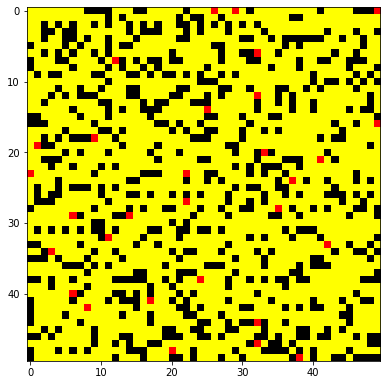

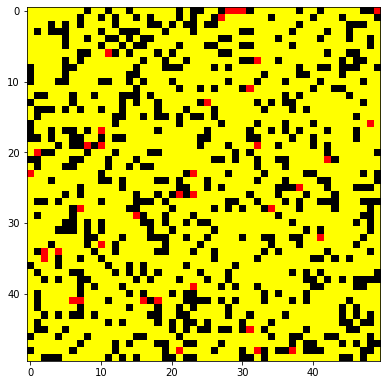

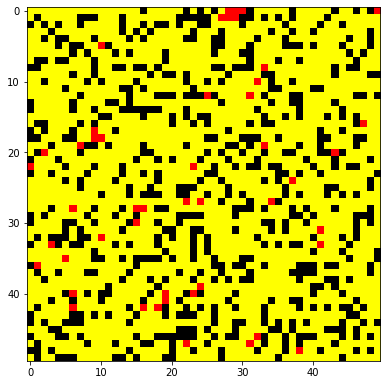

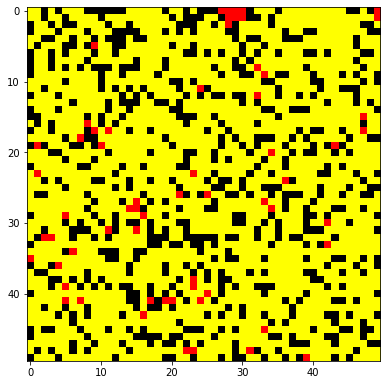

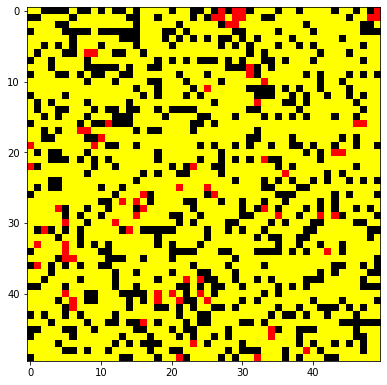

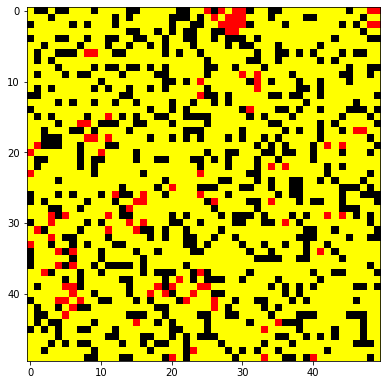

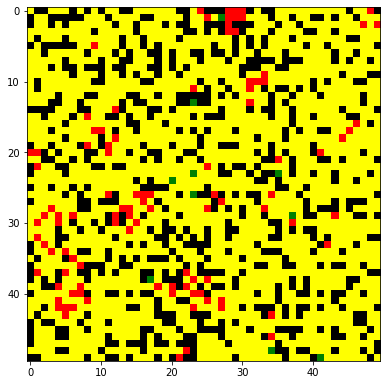

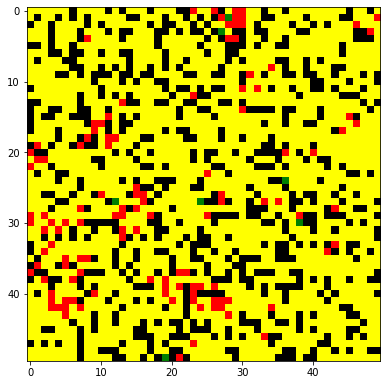

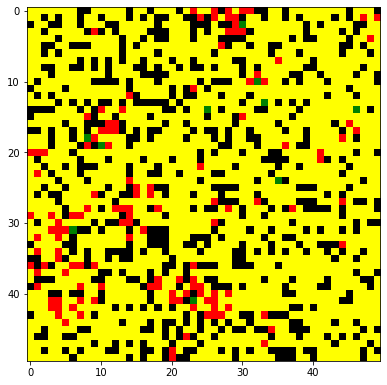

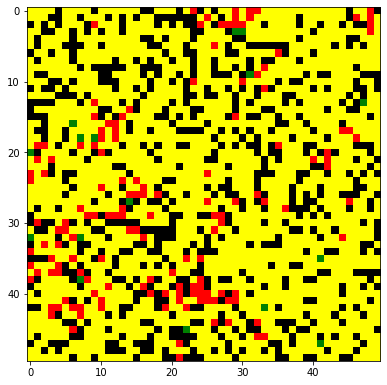

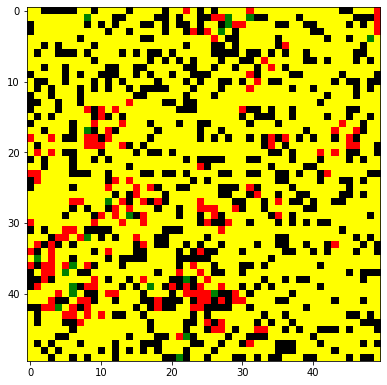

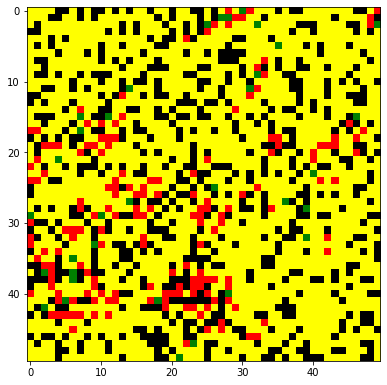

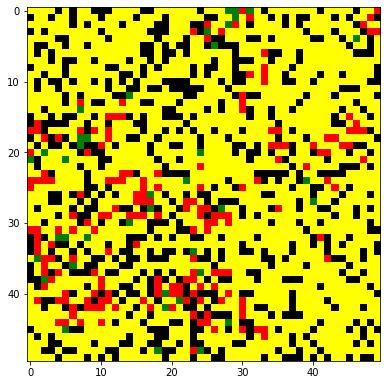

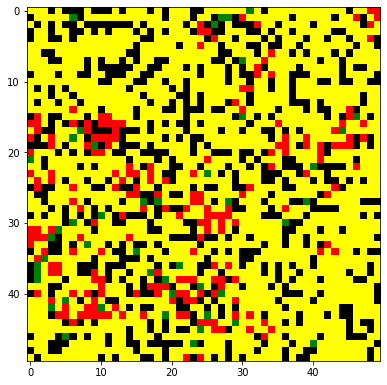

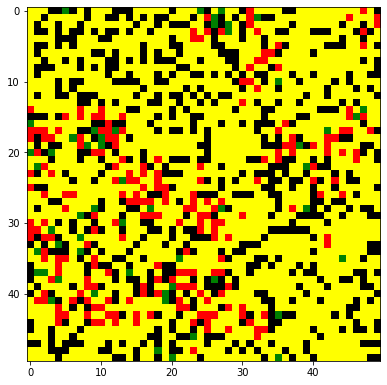

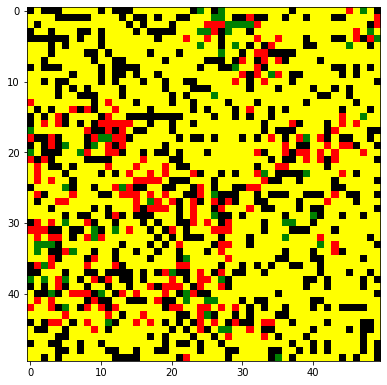

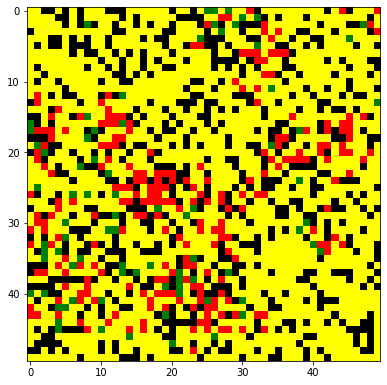

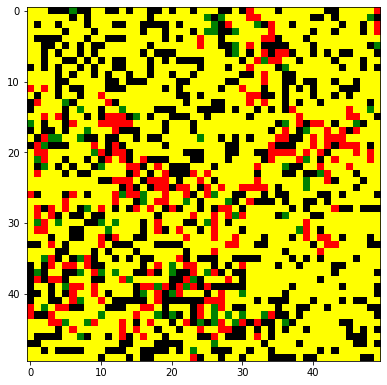

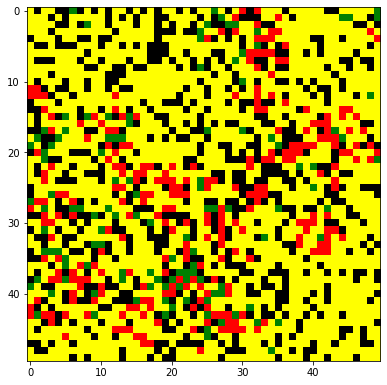

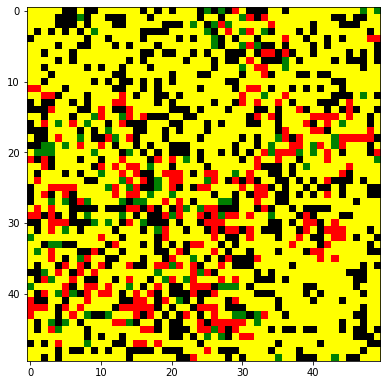

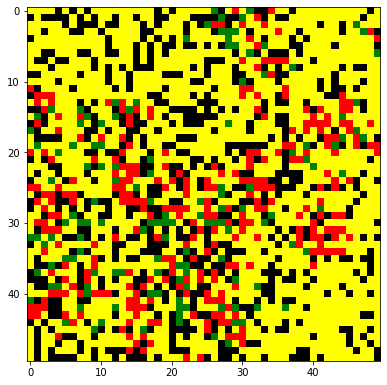

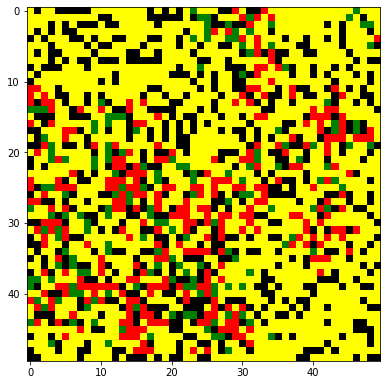

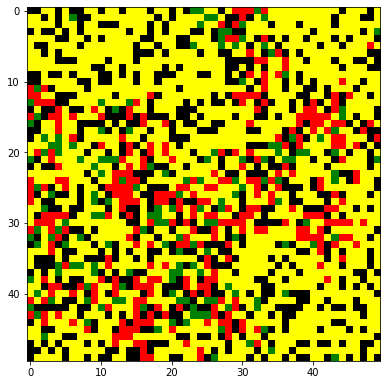

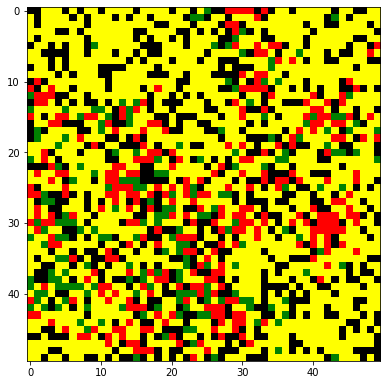

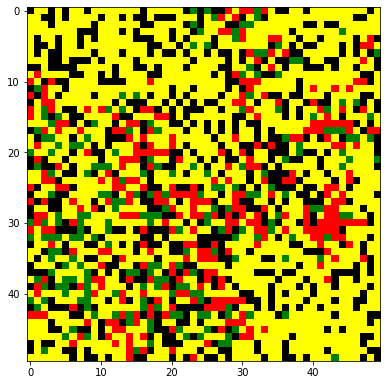

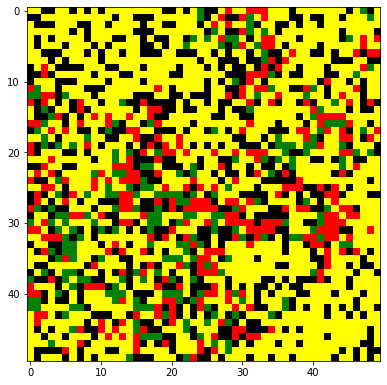

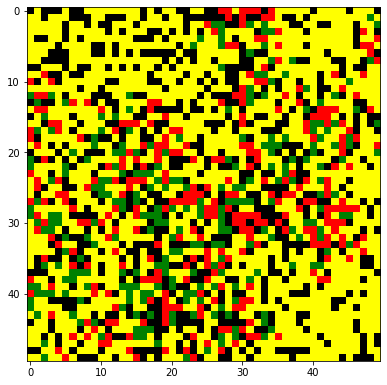

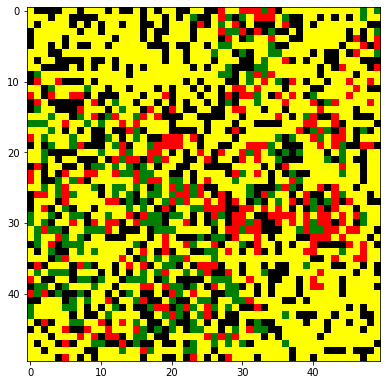

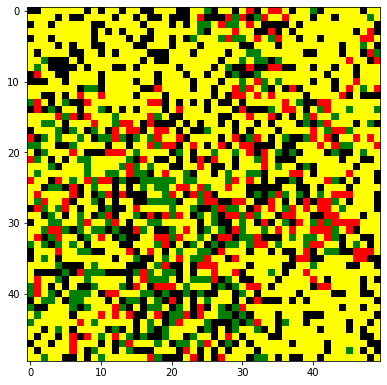

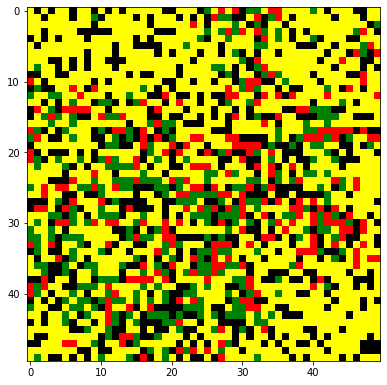

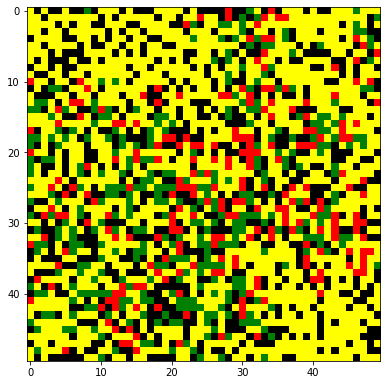

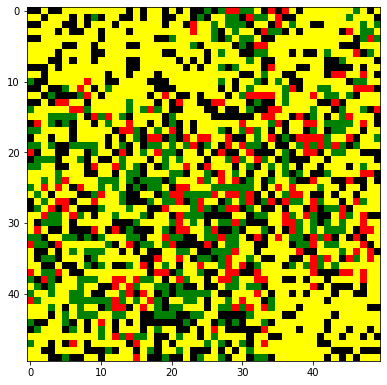

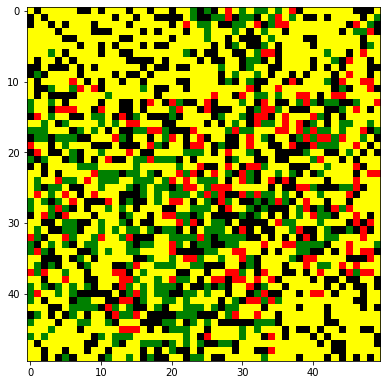

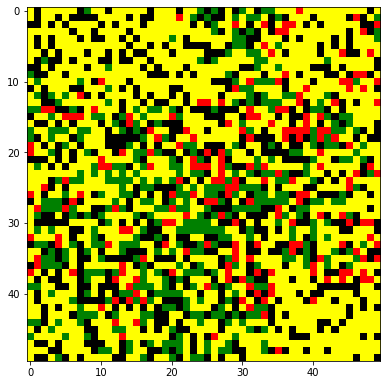

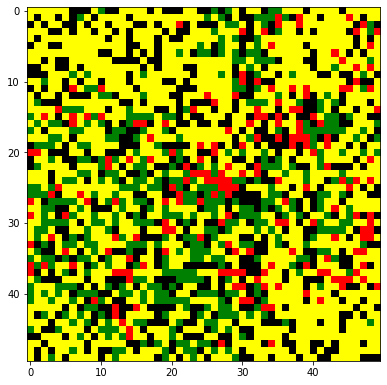

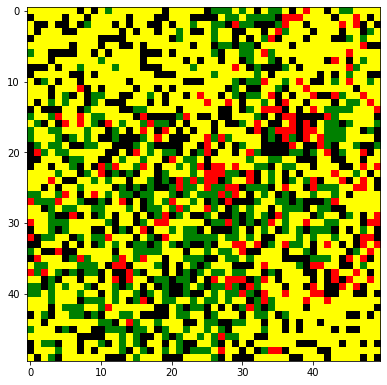

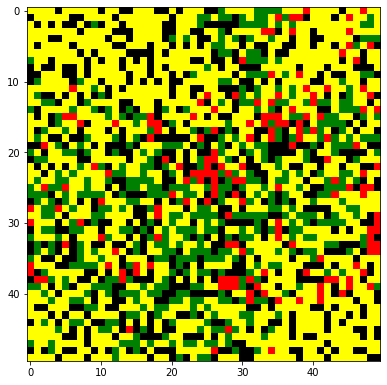

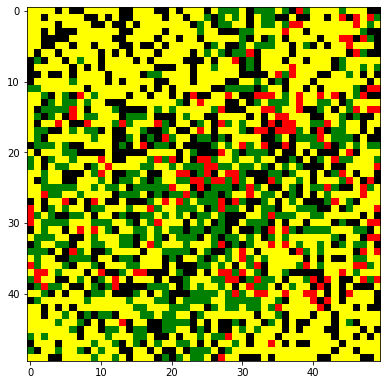

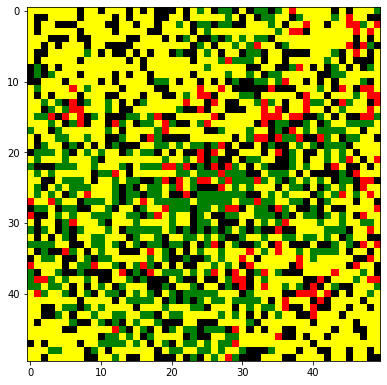

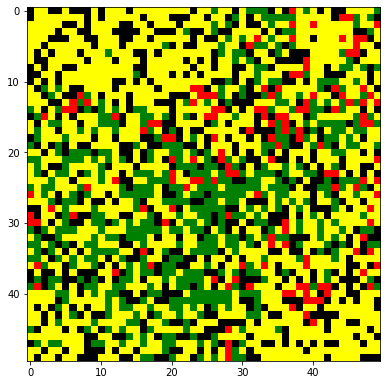

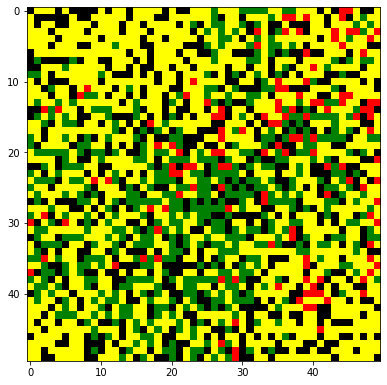

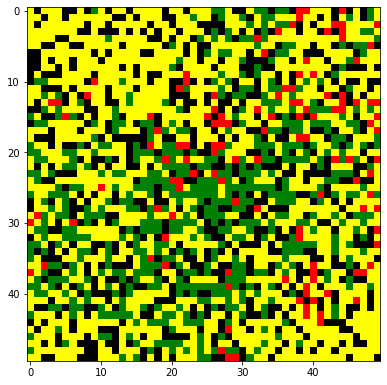

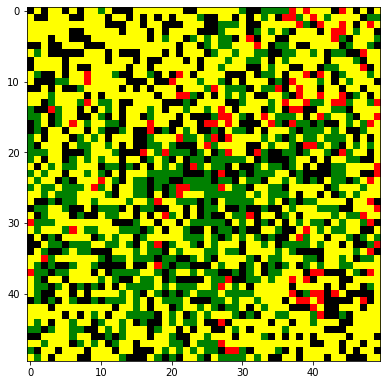

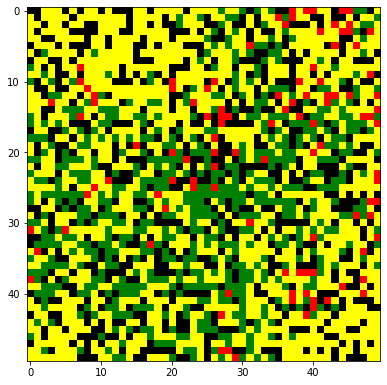

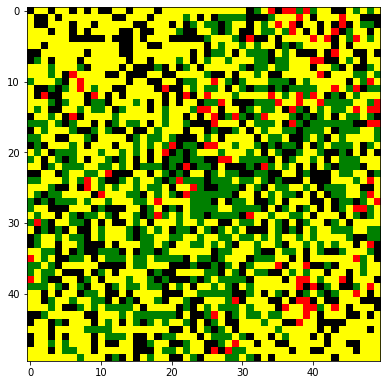

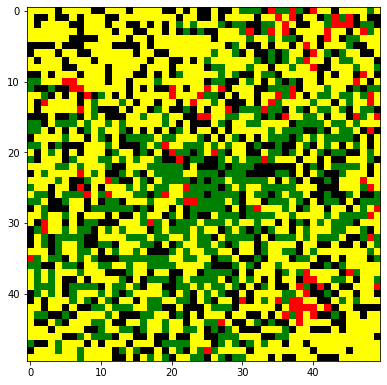

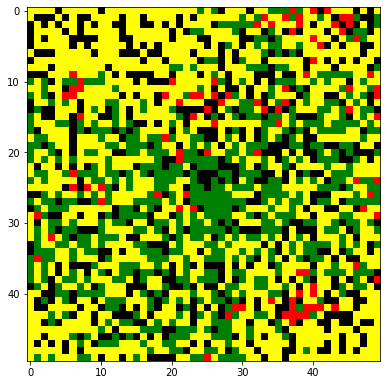

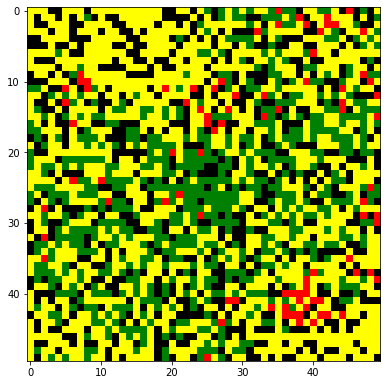

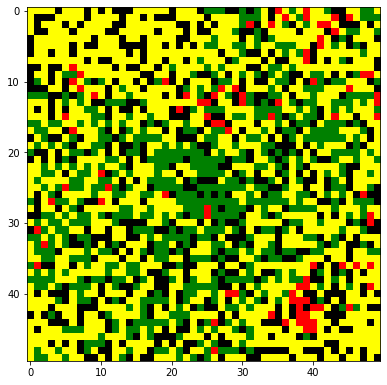

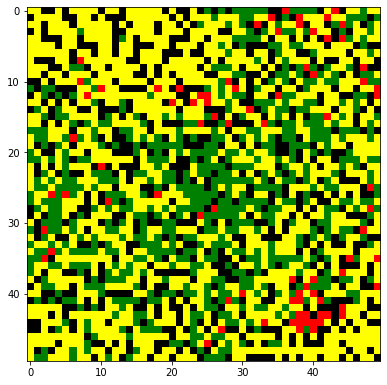

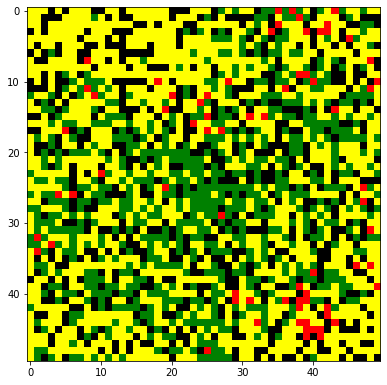

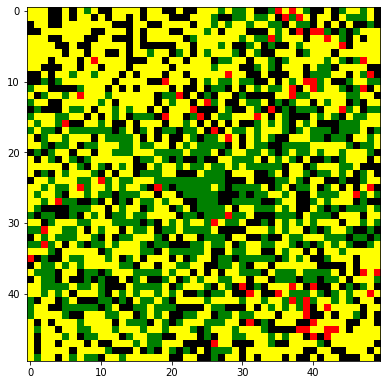

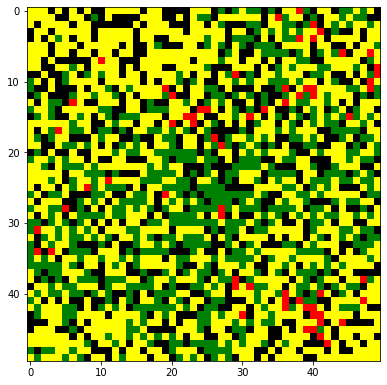

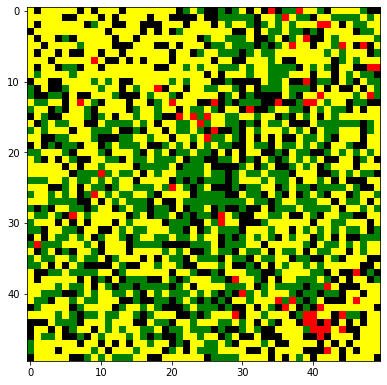

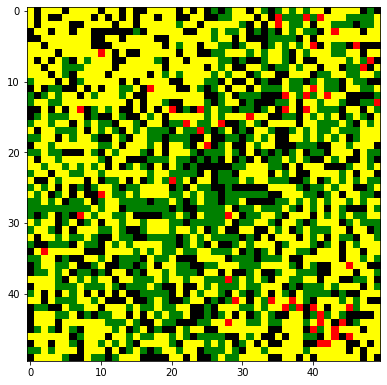

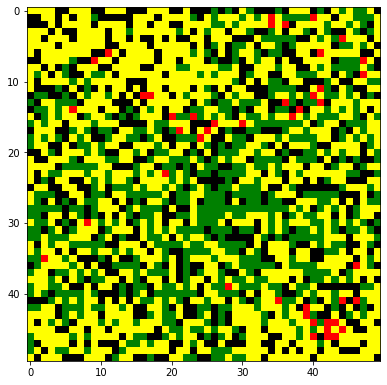

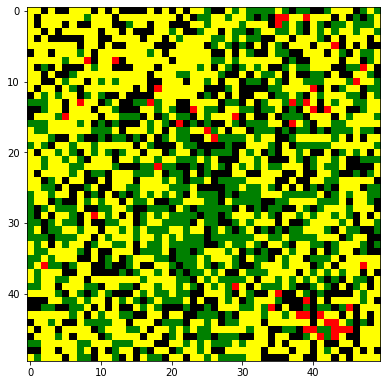

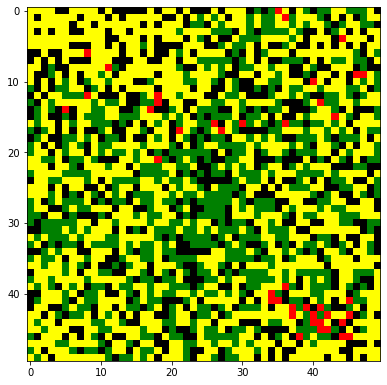

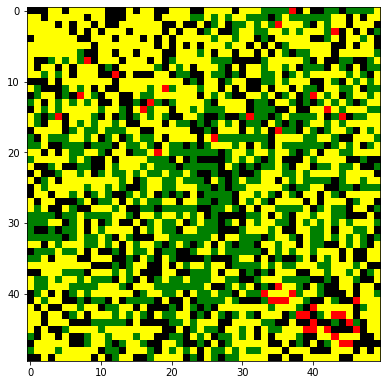

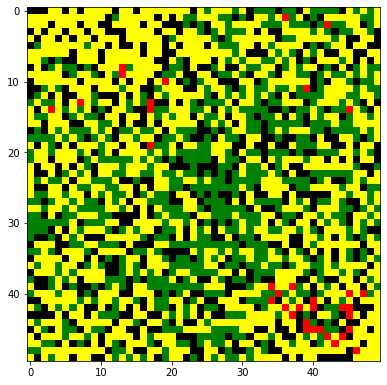

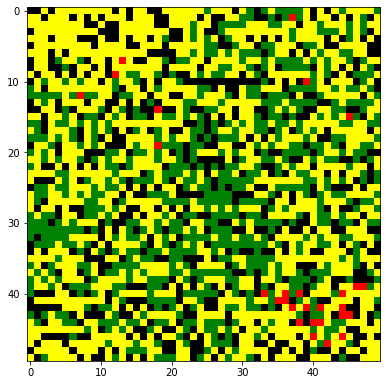

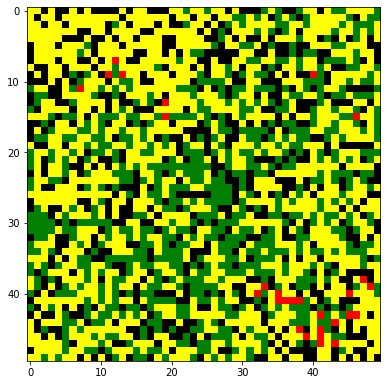

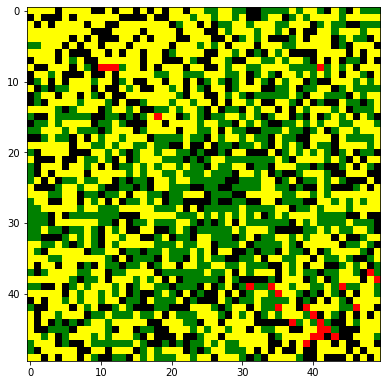

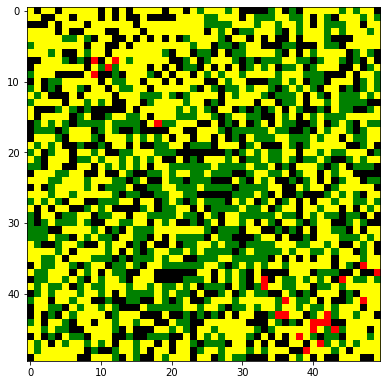

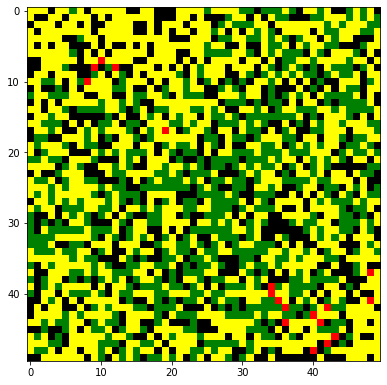

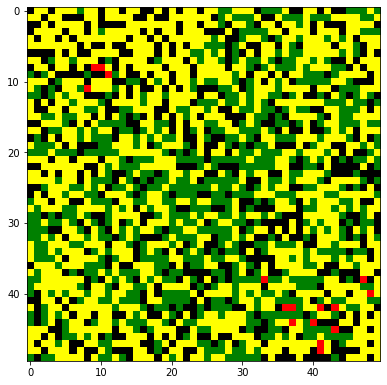

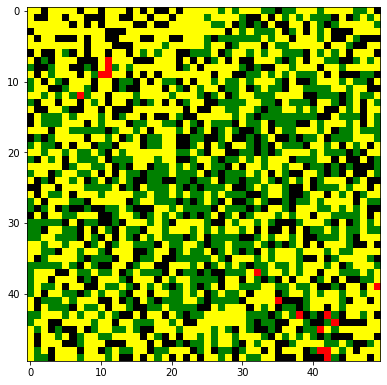

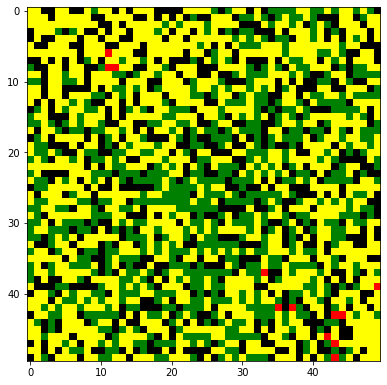

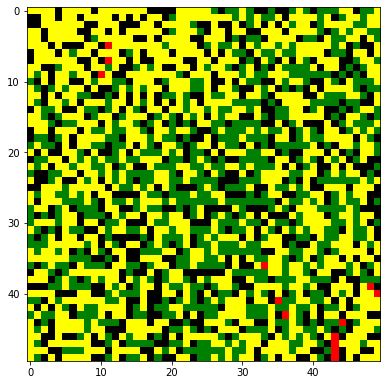

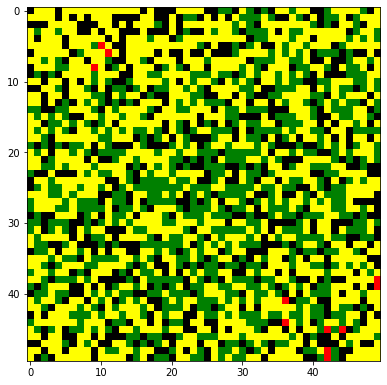

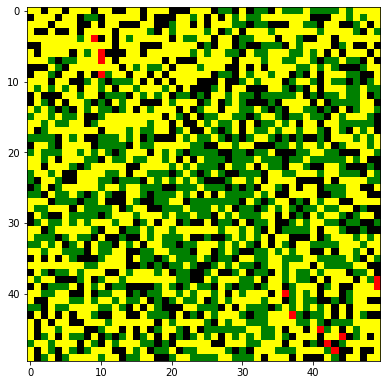

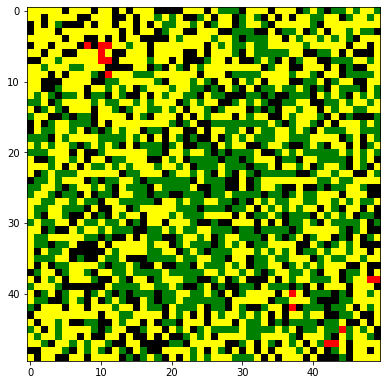

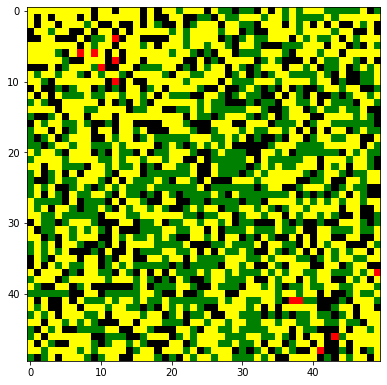

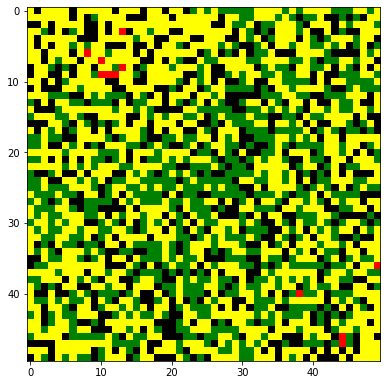

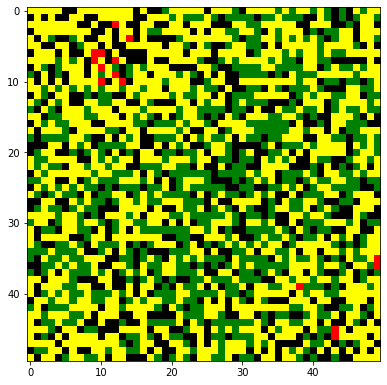

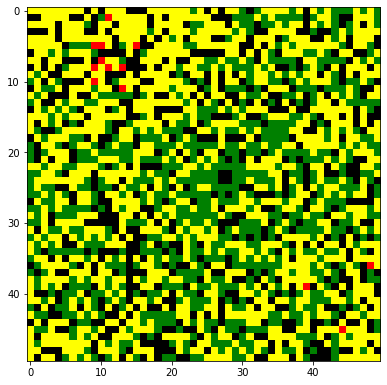

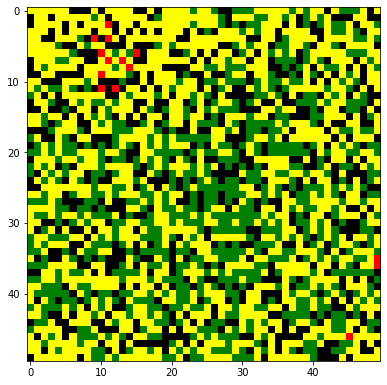

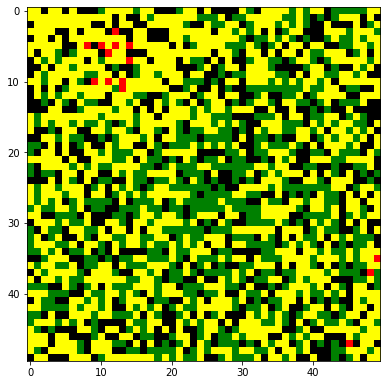

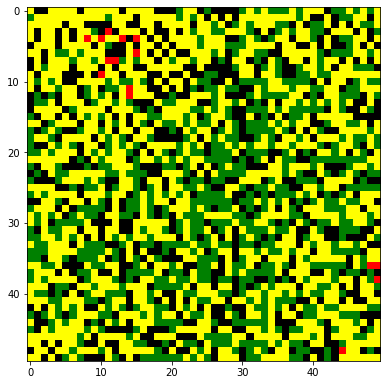

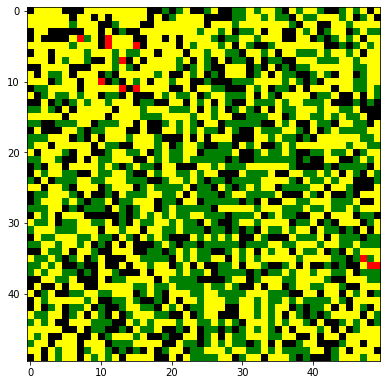

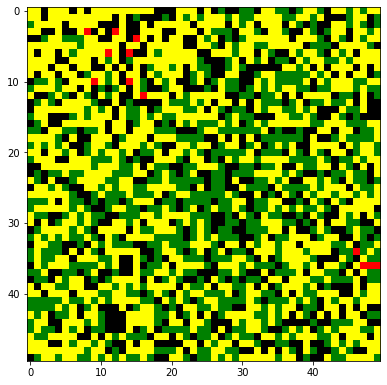

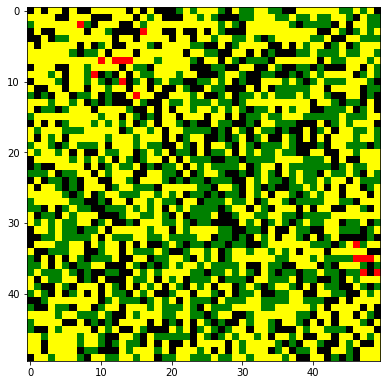

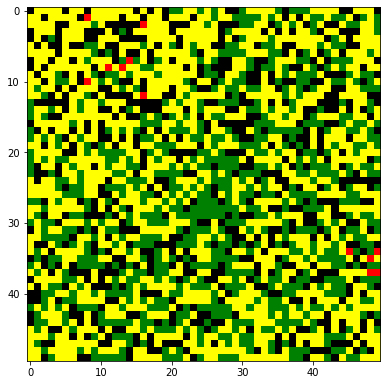

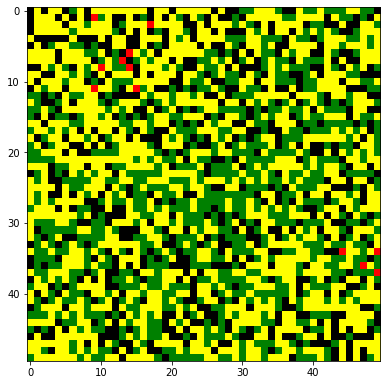

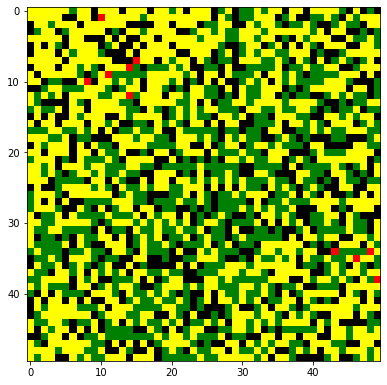

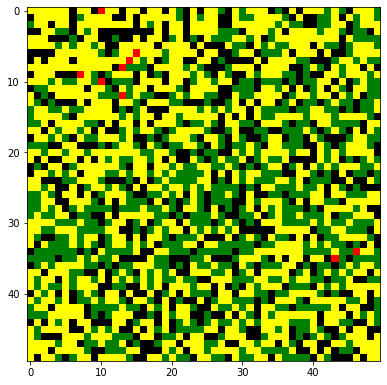

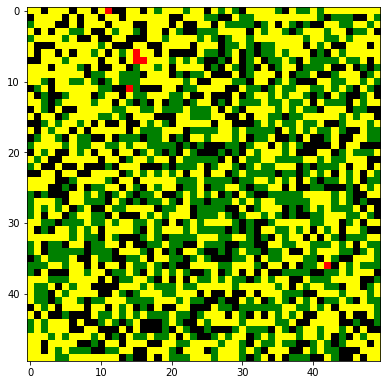

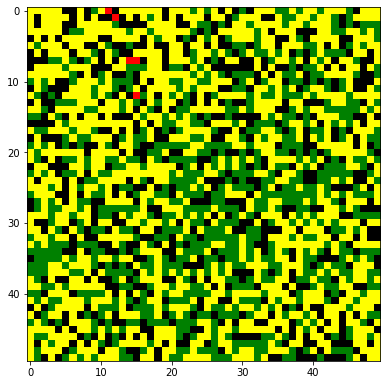

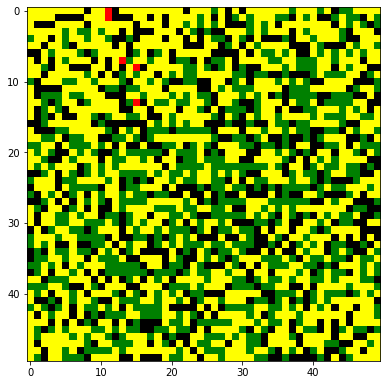

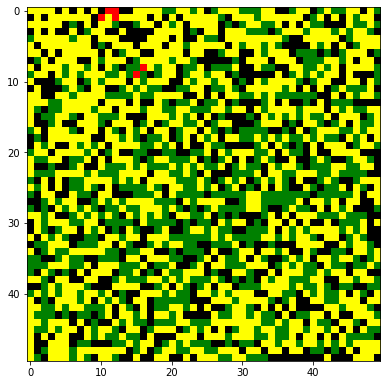

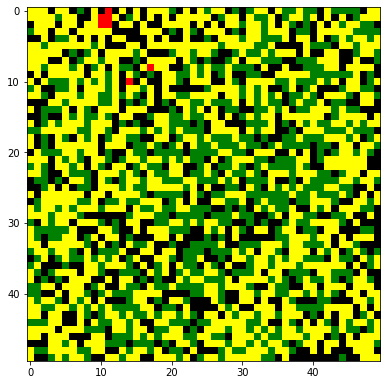

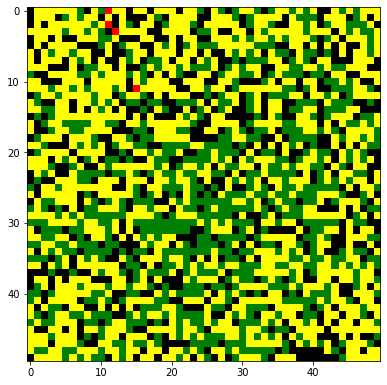

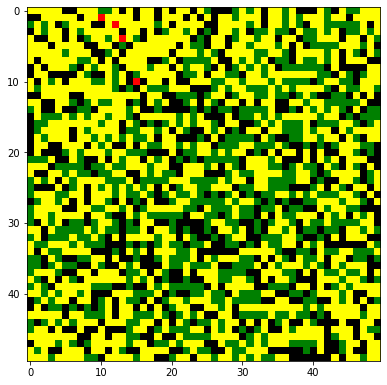

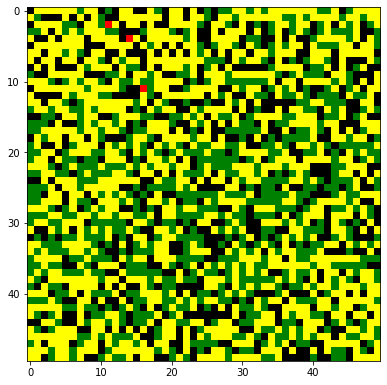

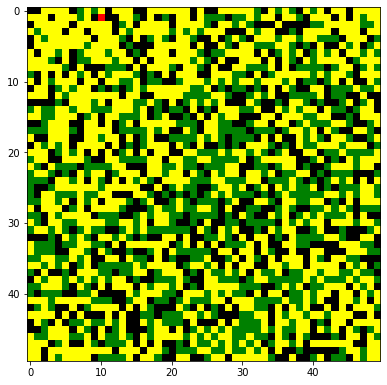

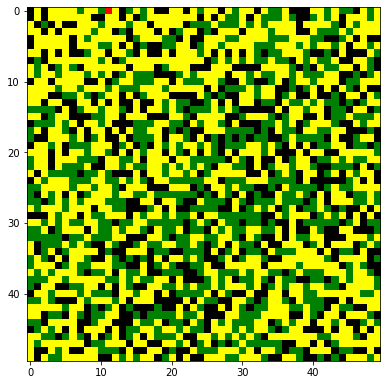

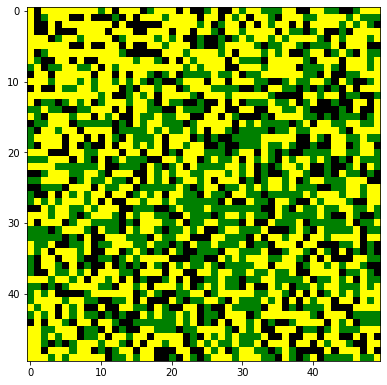

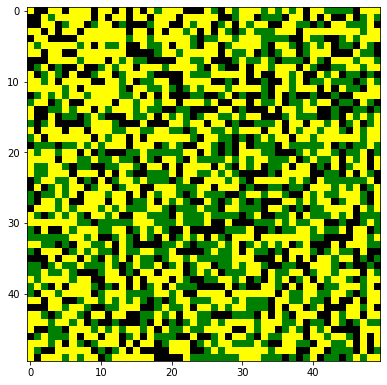

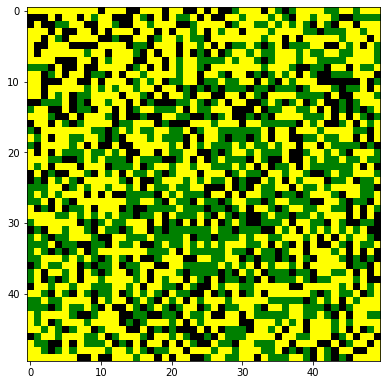

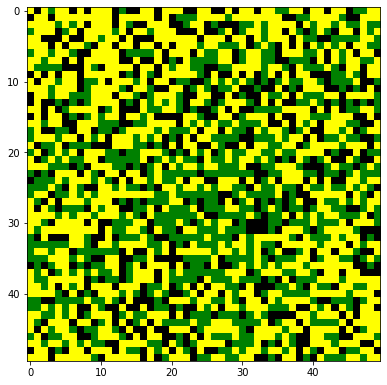

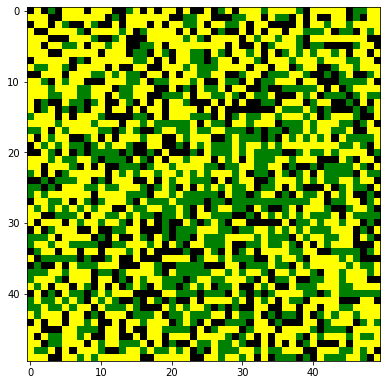

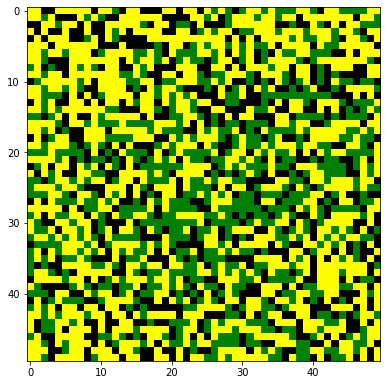

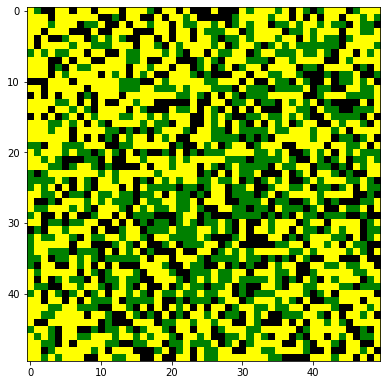

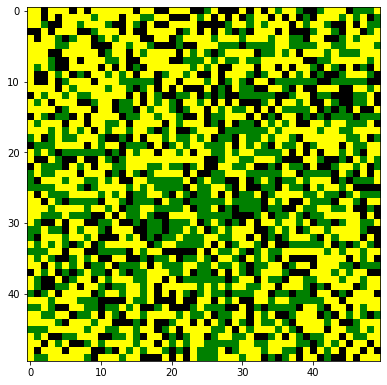

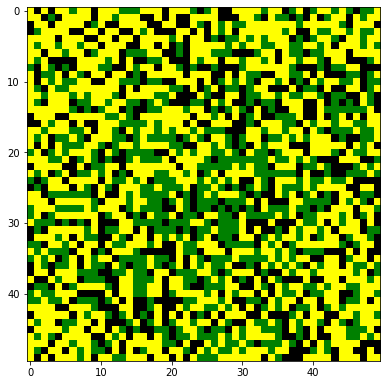

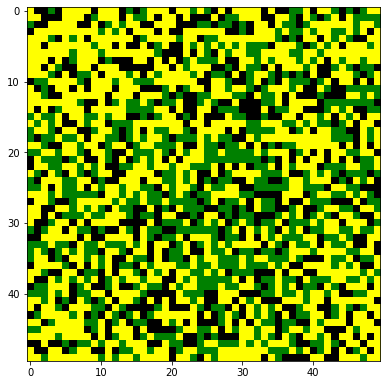

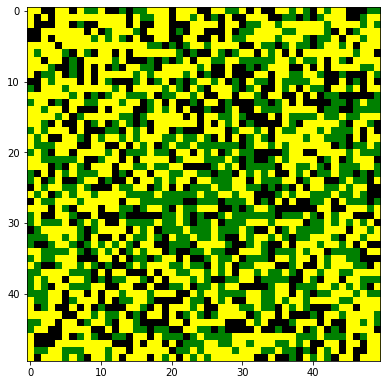

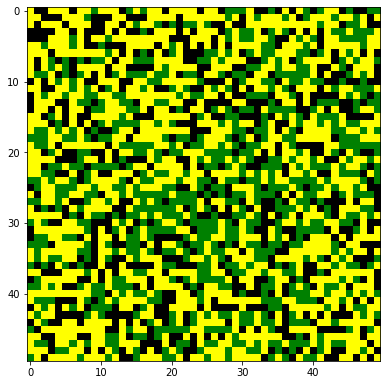

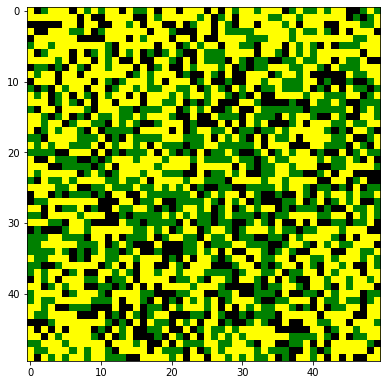

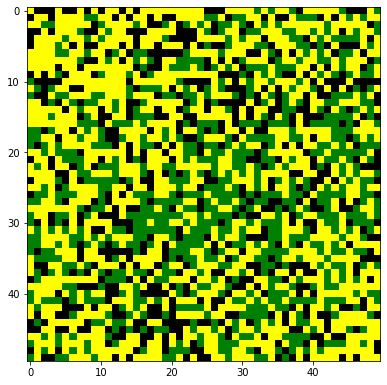

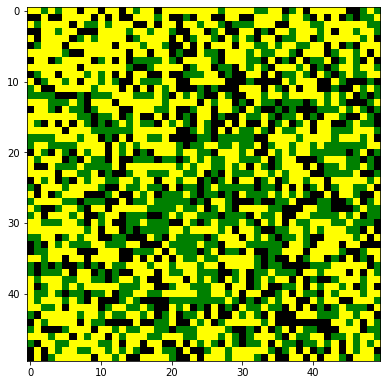

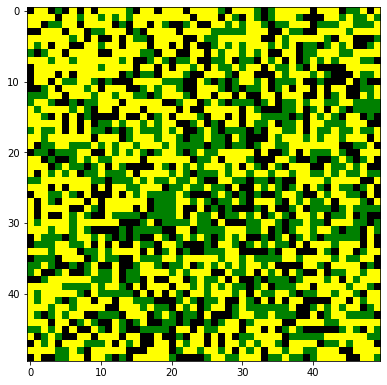

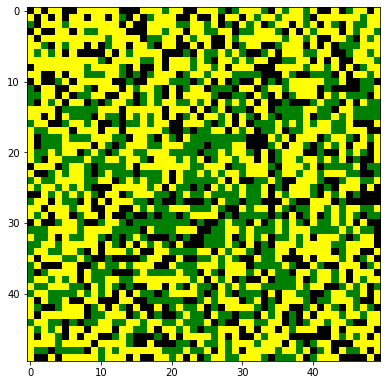

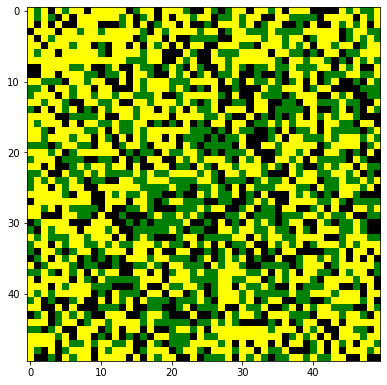

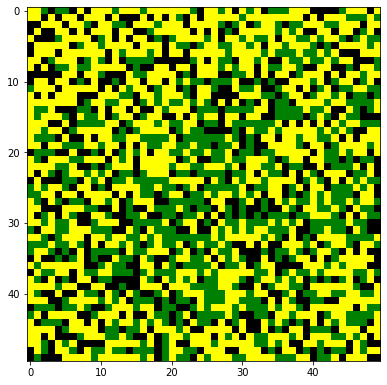

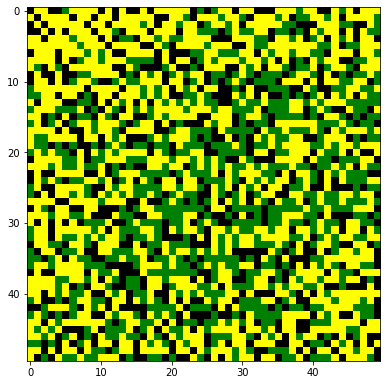

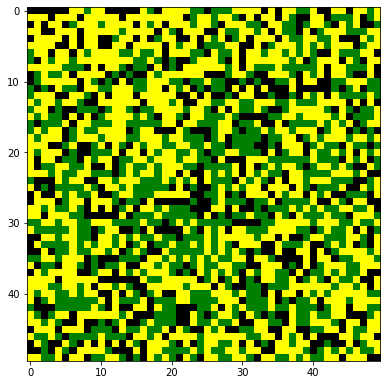

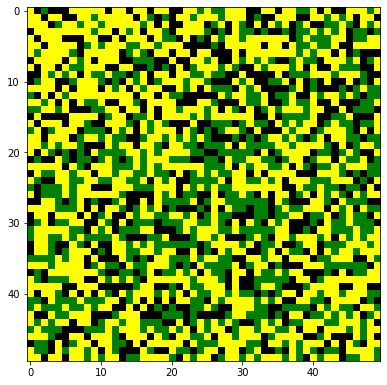

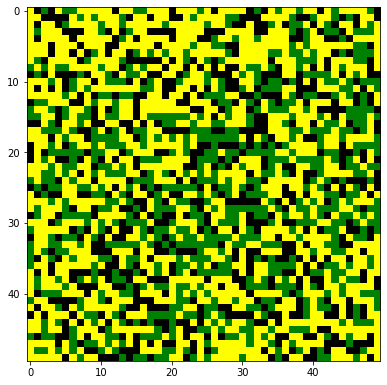

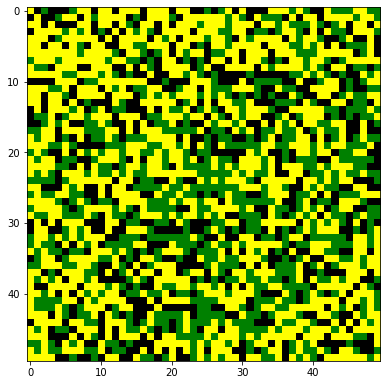

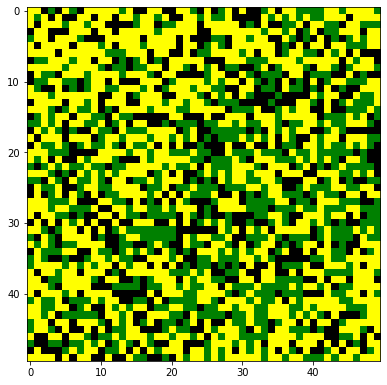

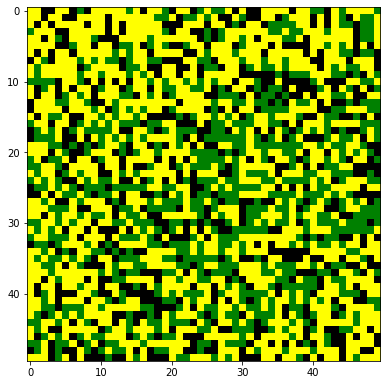

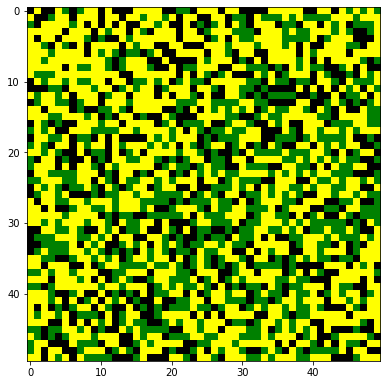

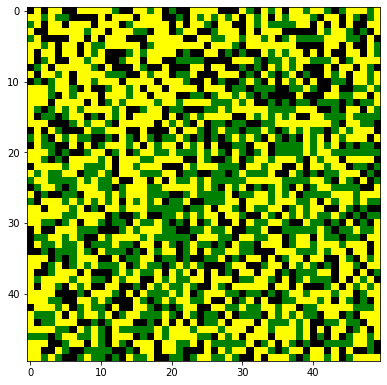

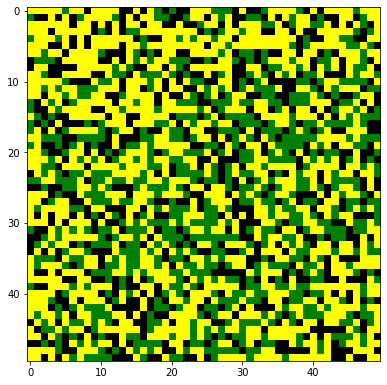

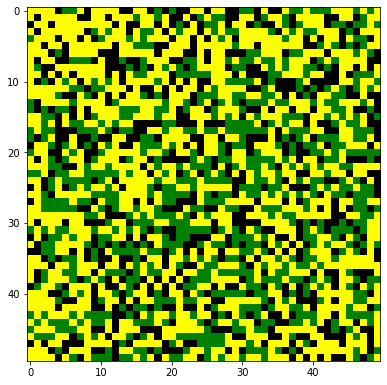

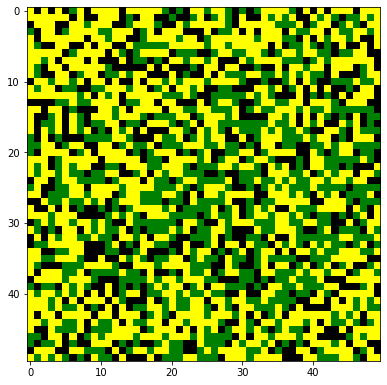

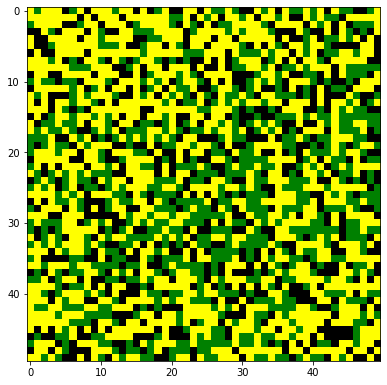

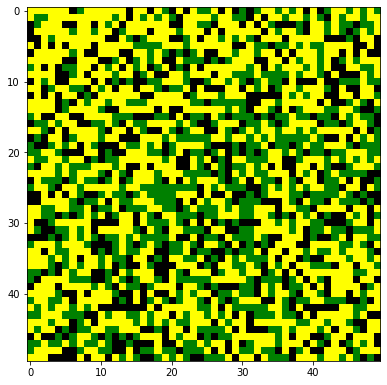

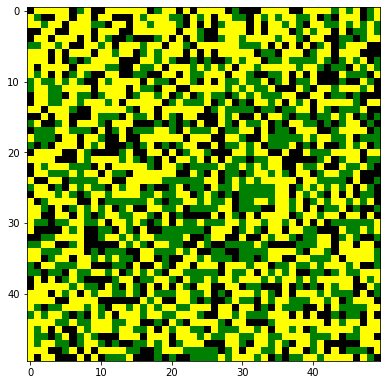

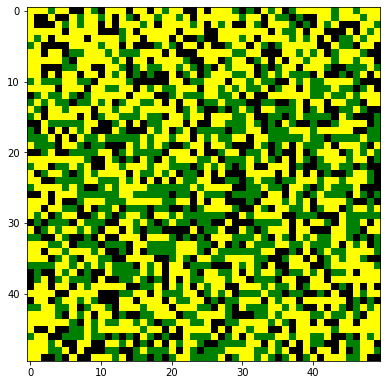

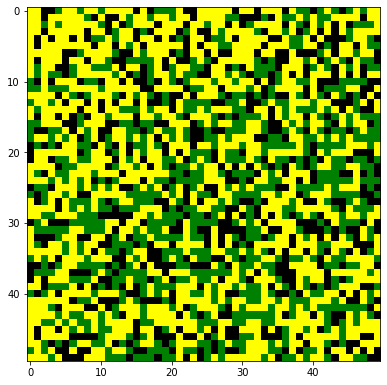

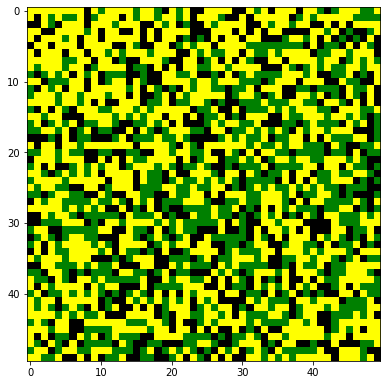

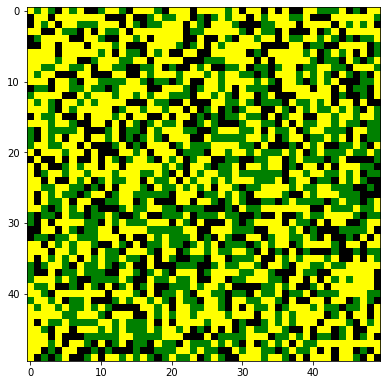

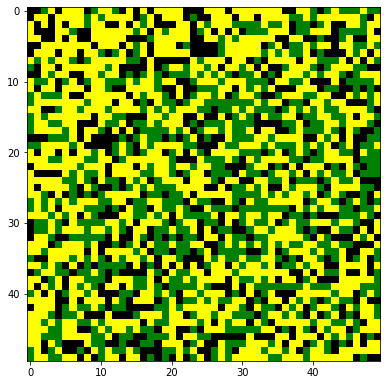

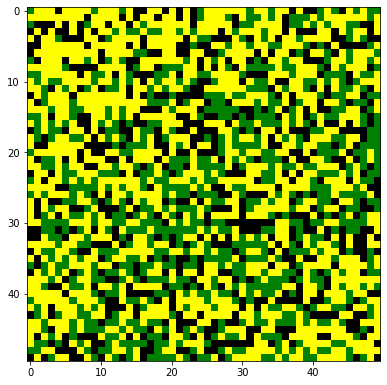

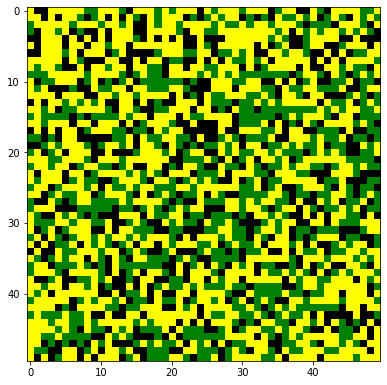

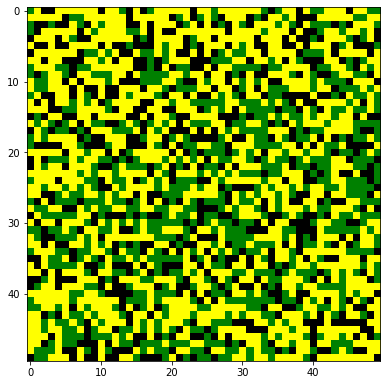

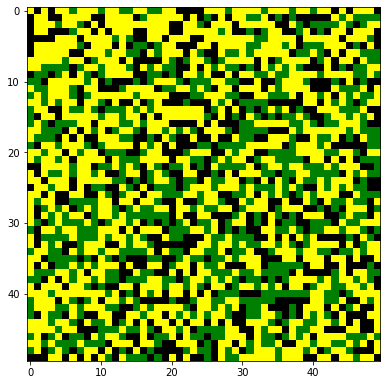

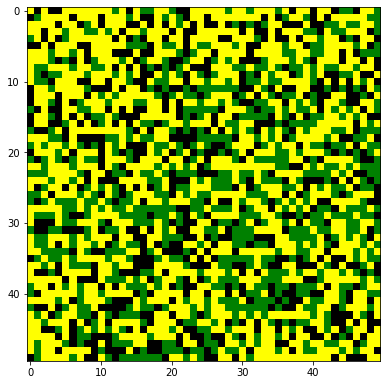

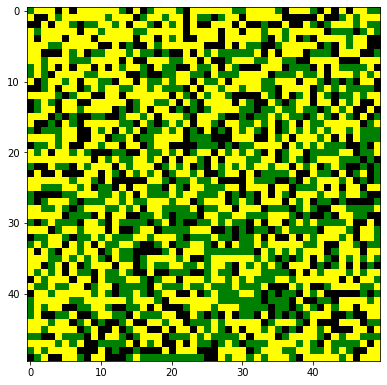

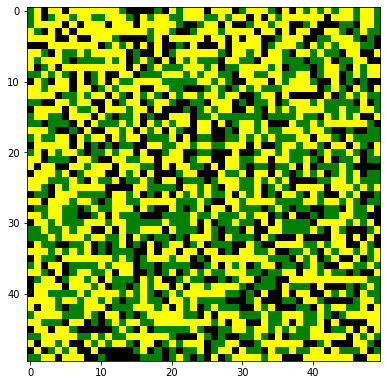

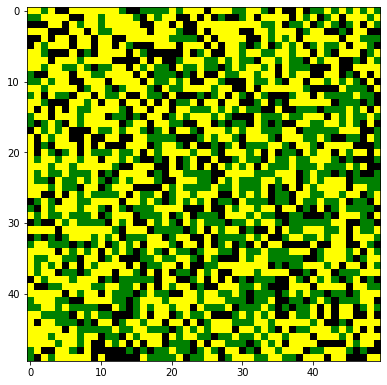

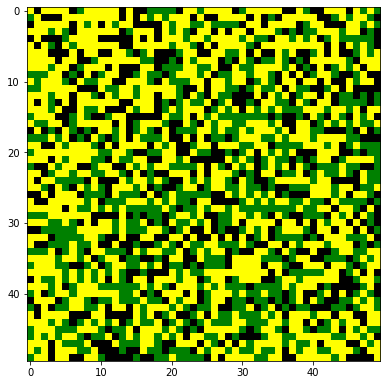

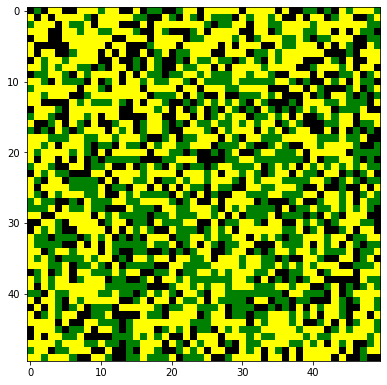

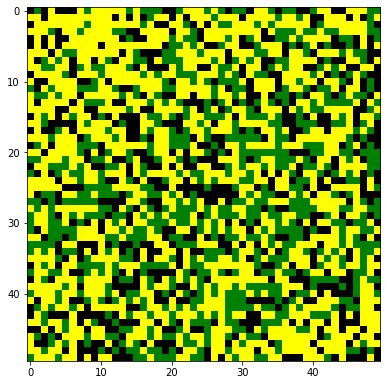

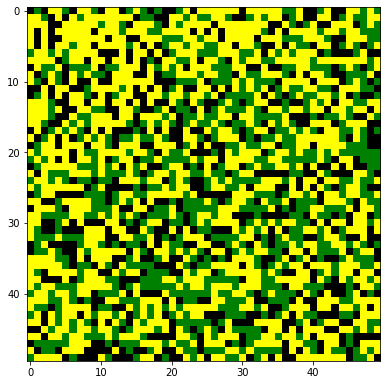

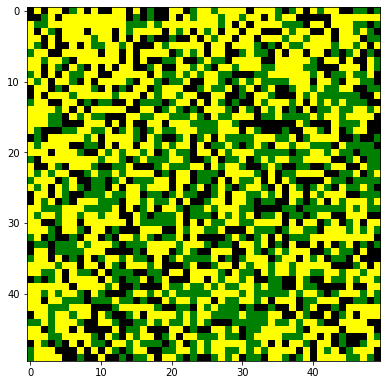

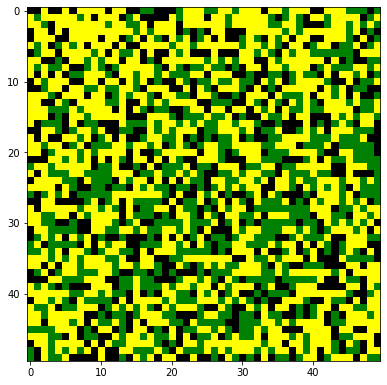

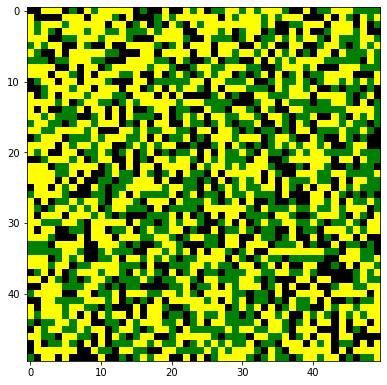

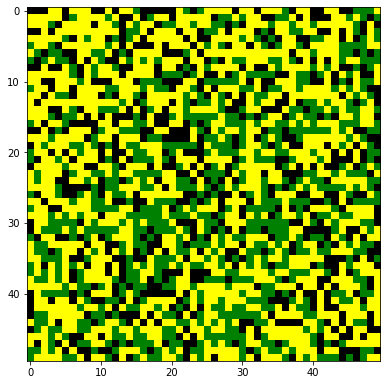

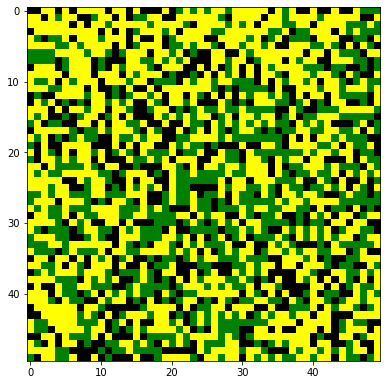

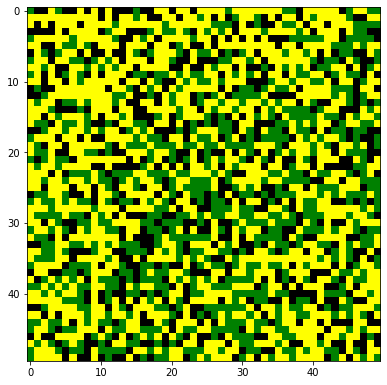

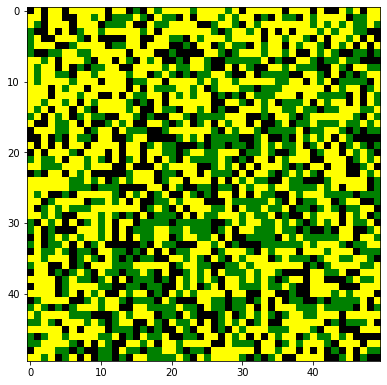

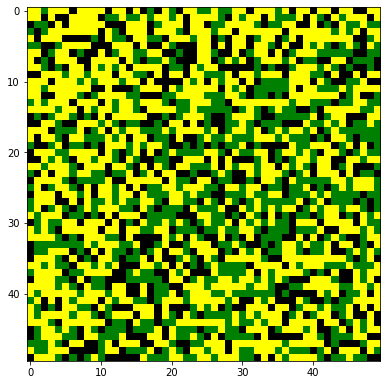

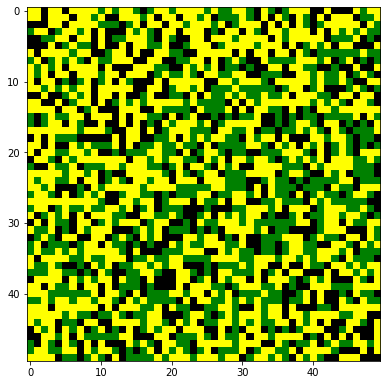

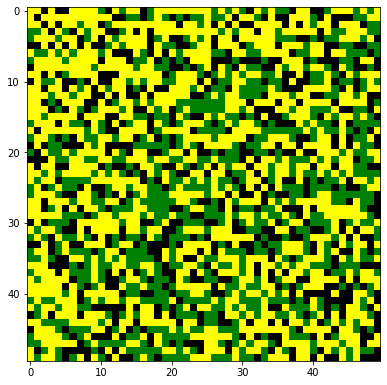

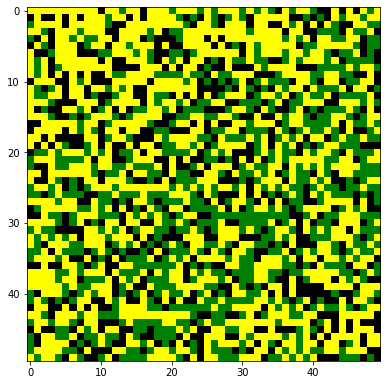

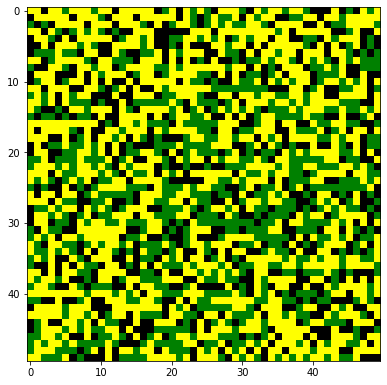

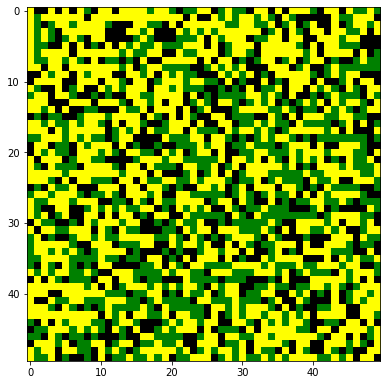

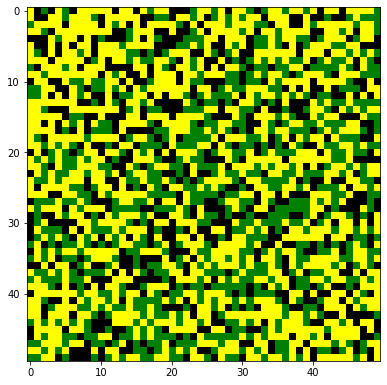

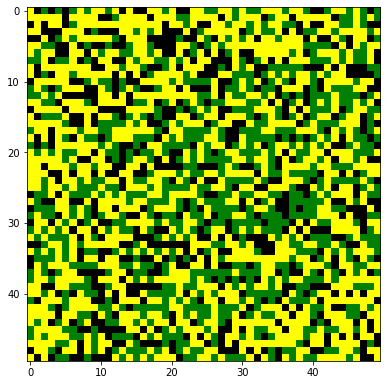

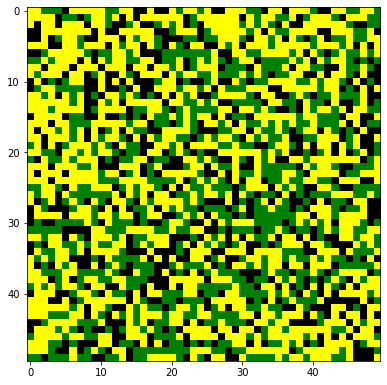

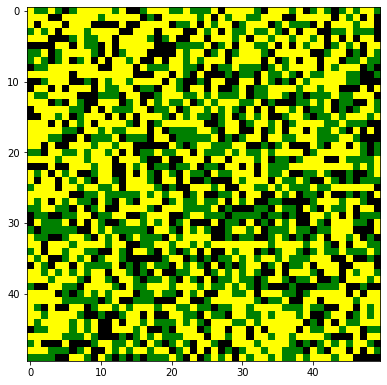

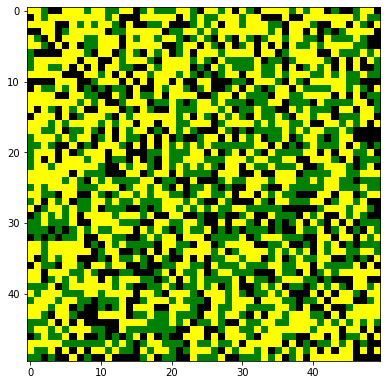

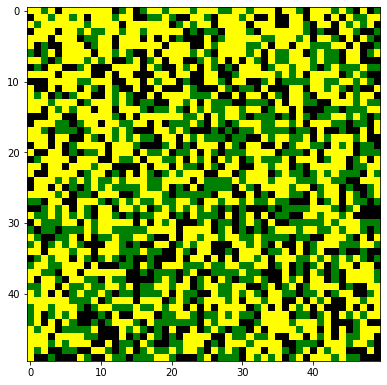

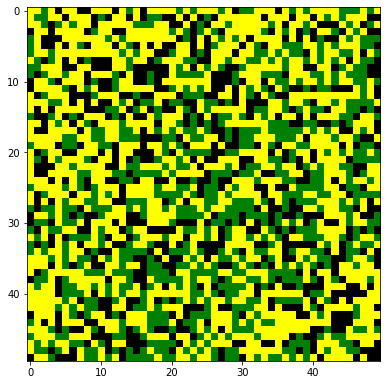

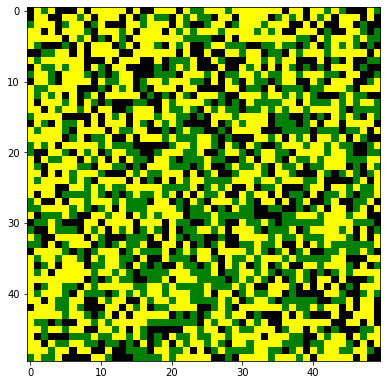

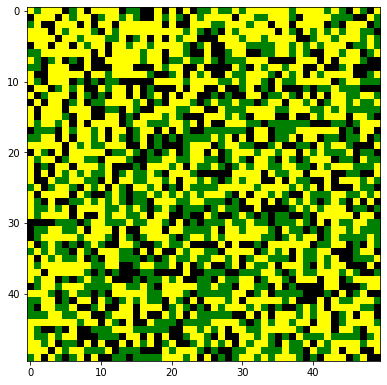

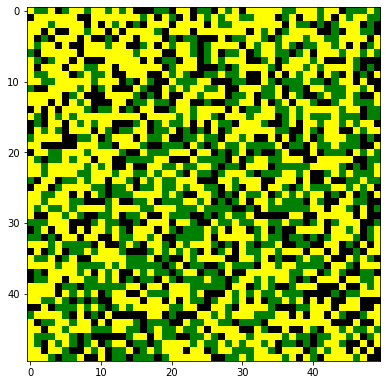

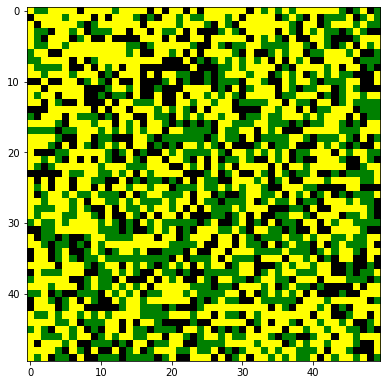

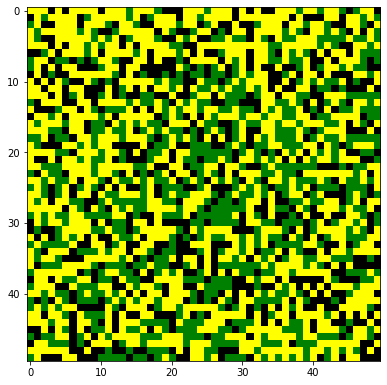

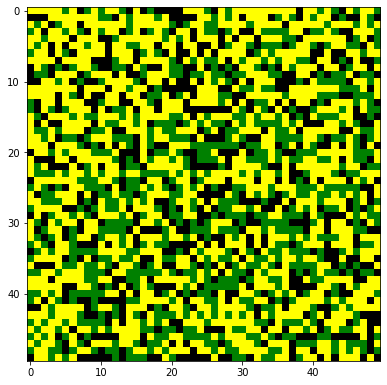

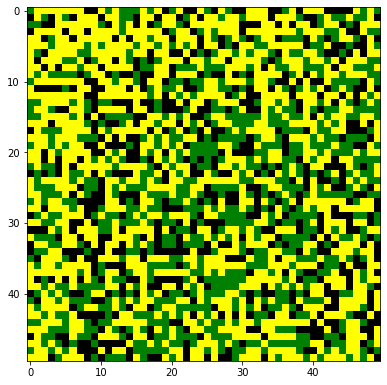

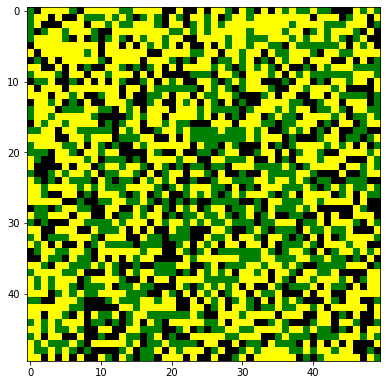

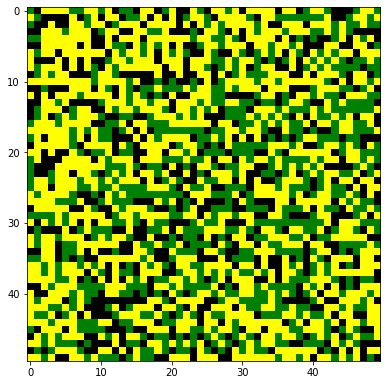

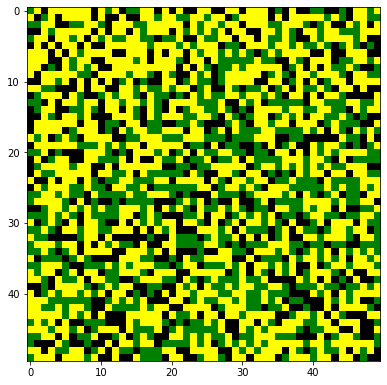

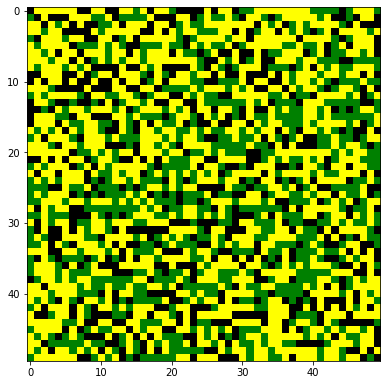

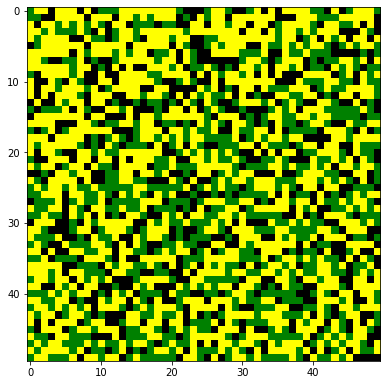

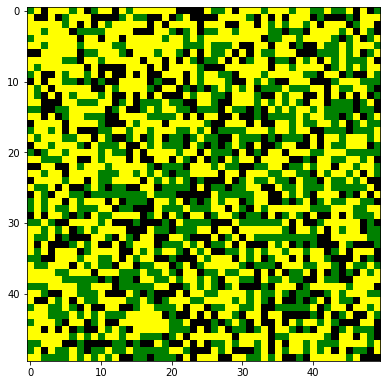

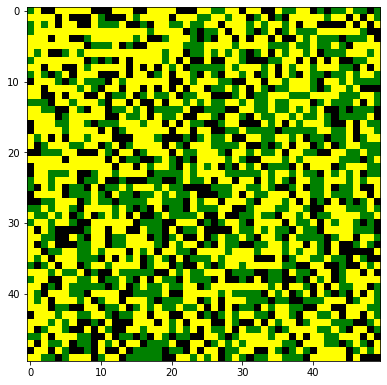

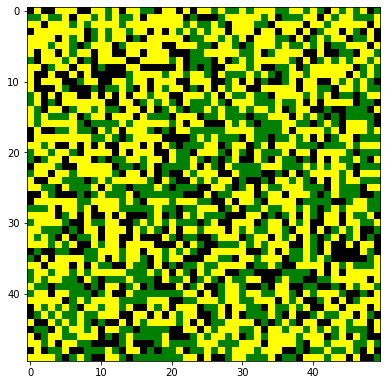

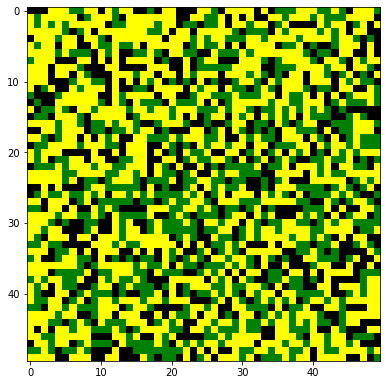

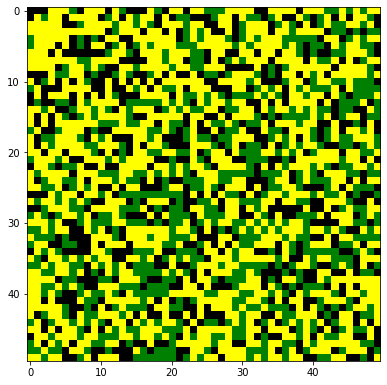

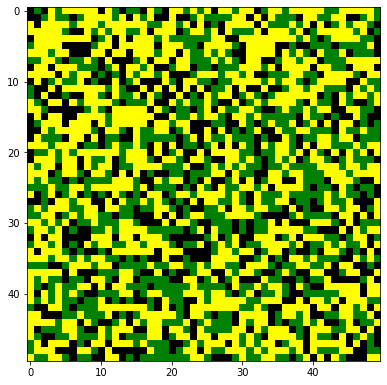

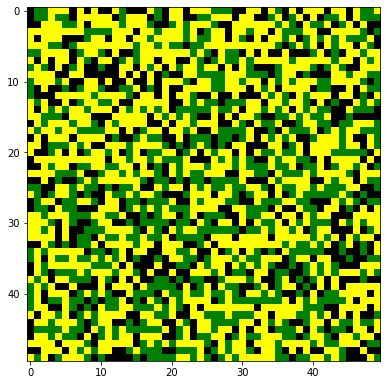

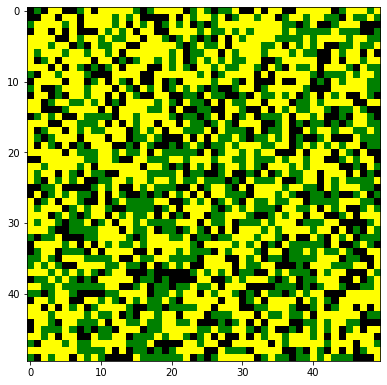

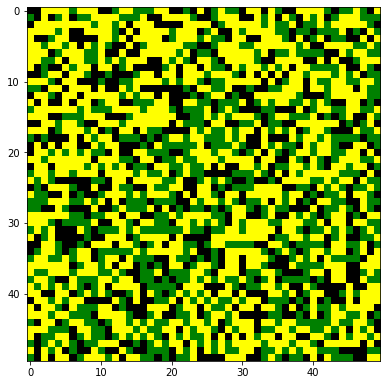

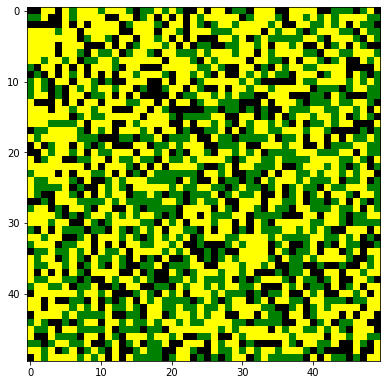

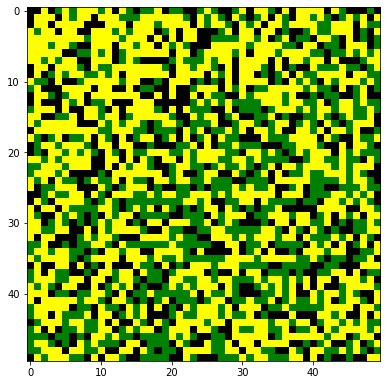

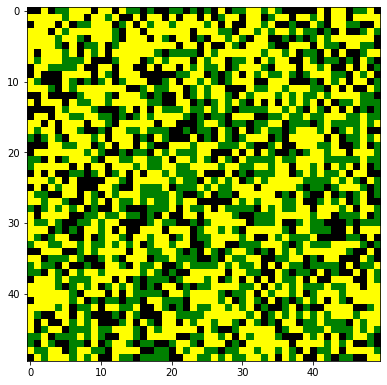

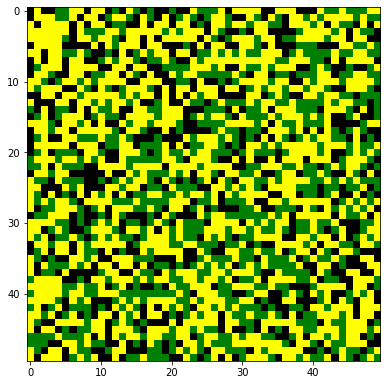

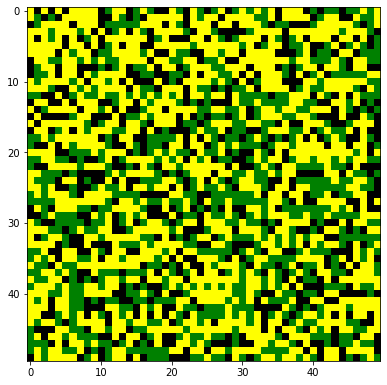

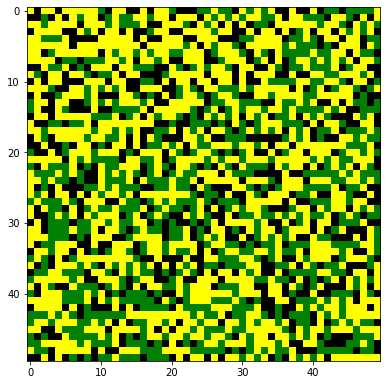

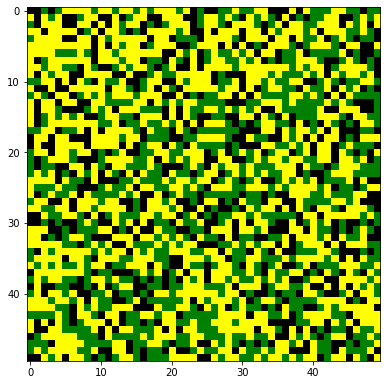

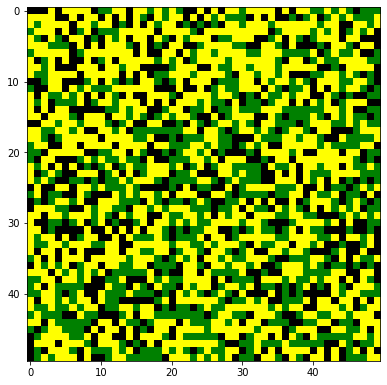

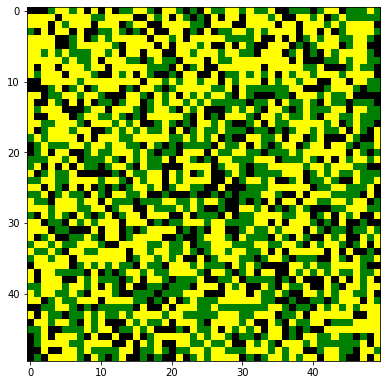

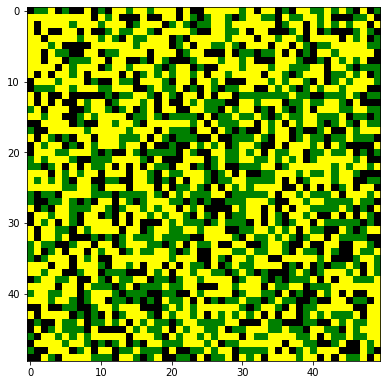

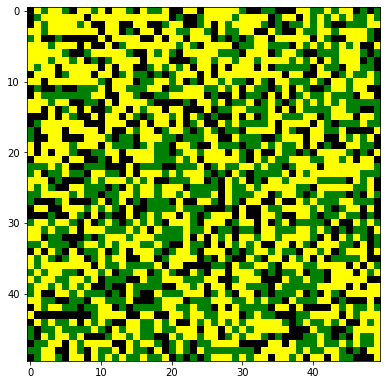

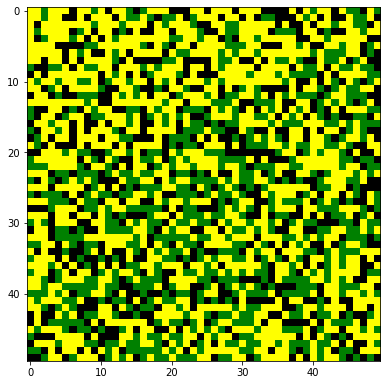

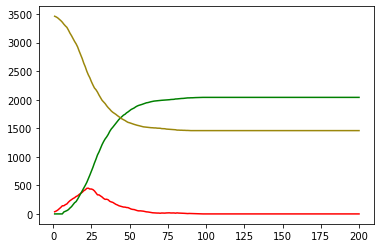

In [33]:
simulation(3500,50,50,0.2,7,200)

In [37]:
import imageio
import os

path = 'I:\Coding\CS51 Assignment 2\image' # on Mac: right click on a folder, hold down option, and click "copy as pathname"

image_folder = os.fsencode(path)

filenames = []

for file in os.listdir(image_folder):
    filename = os.fsdecode(file)
    if filename.endswith( ('.jpeg', '.png', '.gif') ):
        filename = "image" + "\\" + filename
        filenames.append(filename)

print(filenames)
filenames.sort() # this iteration technique has no built in order, so sort the frames
print(filenames)
images = list(map(lambda filename: imageio.imread(filename), filenames))
imageio.mimsave(os.path.join('movie.gif'), images, duration = 0.5) # modify duration as needed